# Figures

How easily can I dump what I need?

Dumping via Other/build.py

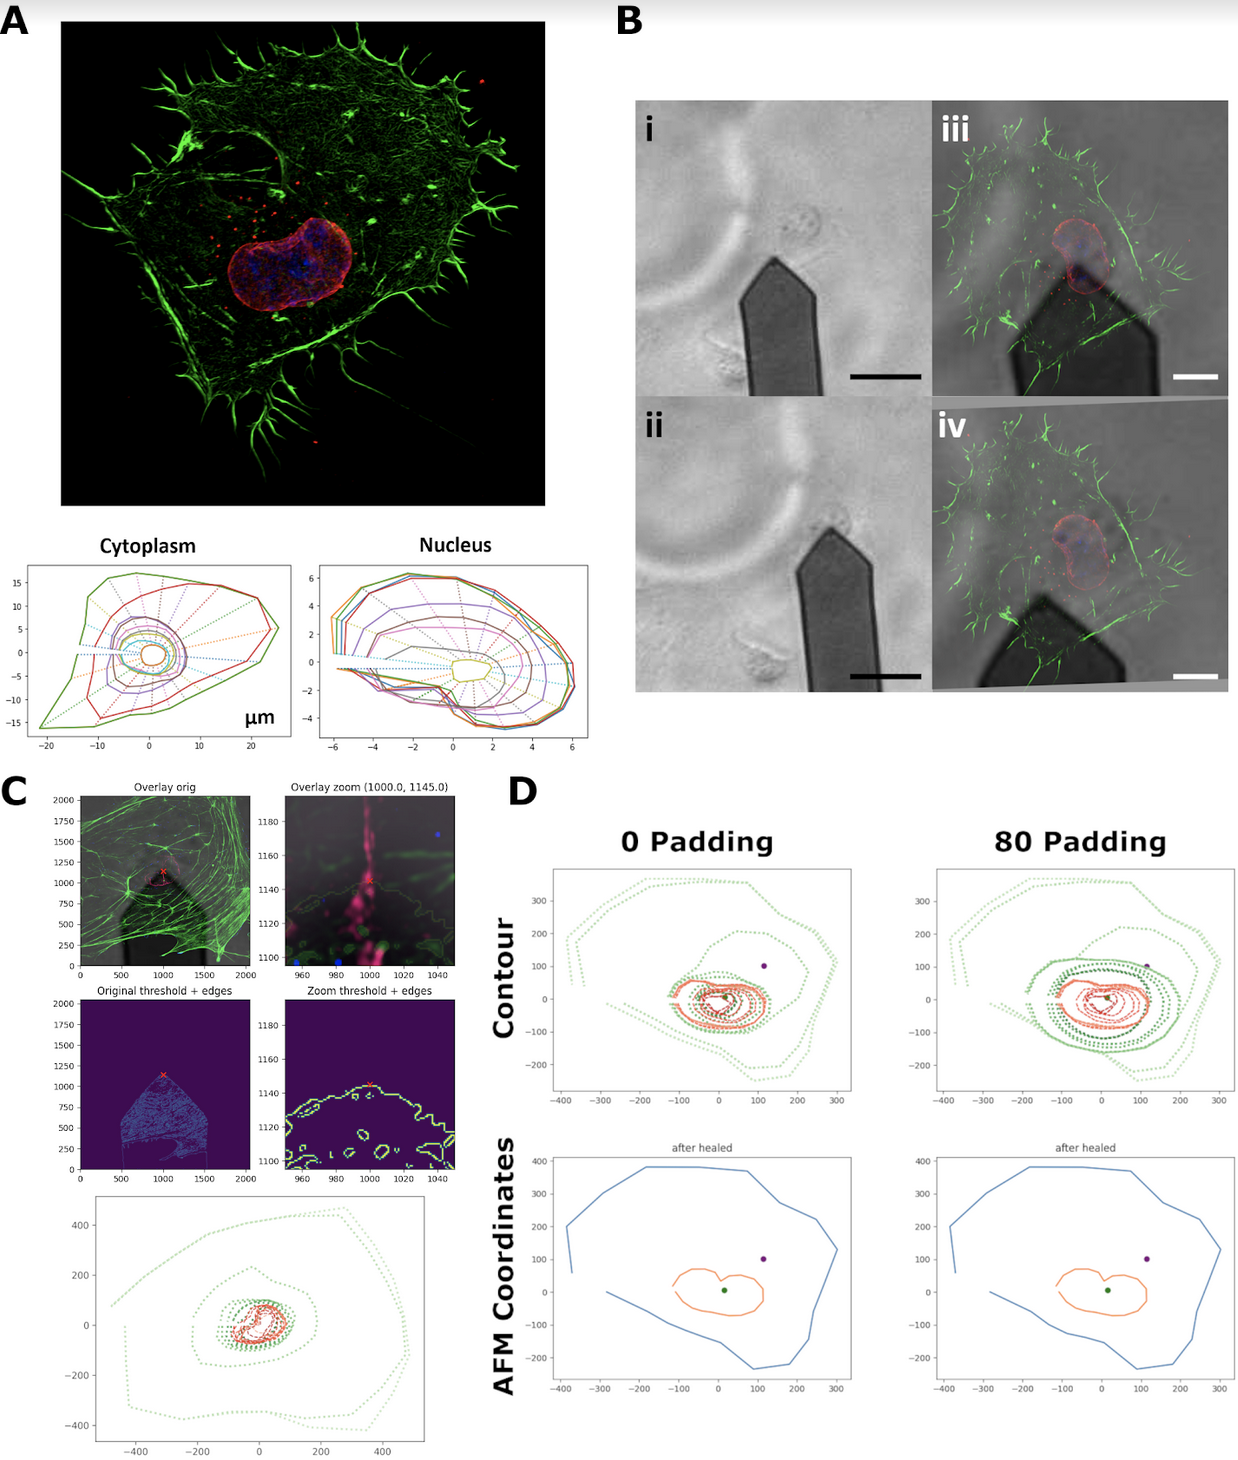

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [181]:
padding = 0
meta = np.load('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/to_dump.npy' % padding, 
               allow_pickle=True).item(); print(meta.keys())

dict_keys(['cyto_meta', 'nuc_meta', 'nucleus_contour', 'cyto_contour', 'scaling', 'ee', 'ne'])


In [155]:
meta['nuc_meta']

{'move_to_mean': (1.4278098819868967, 14.34511102621997, 9.0),
 'files_list': ['C_Nuc_Z01.txt',
  'C_Nuc_Z02.txt',
  'C_Nuc_Z03.txt',
  'C_Nuc_Z04.txt',
  'C_Nuc_Z05.txt',
  'C_Nuc_Z06.txt',
  'C_Nuc_Z07.txt',
  'C_Nuc_Z08.txt',
  'C_Nuc_Z09.txt',
  'C_Nuc_Z10.txt'],
 'z_max': 3.2}

In [156]:
meta['ee'].keys()

dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 11, 10, 9])

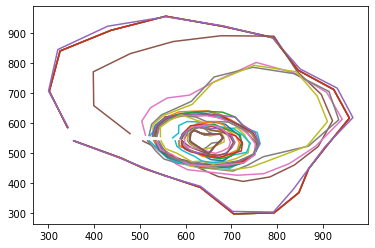

In [157]:
for level in sorted(meta['ee'].keys()):
    plt.plot(meta['ee'][level][0],meta['ee'][level][1])
    

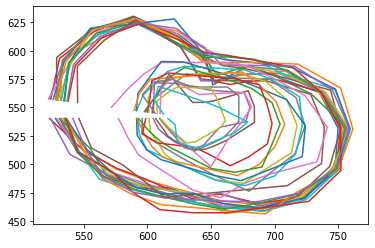

In [158]:
for level in sorted(meta['ne'].keys()):
    plt.plot(meta['ne'][level][0],meta['ne'][level][1])    

In [159]:
# Things I need:
# d Load or dump the interpolated levels
# . Given a set of levels, plot the radial plot thingie
# . Given 
meta['nucleus_contour'].keys()

dict_keys([12.0, 15.22, 18.44, 21.67, 24.89, 28.11, 31.33, 34.56, 37.78, 41.0])

min/max level: 12.0 41.0
min/max level: 9.0 44.0


(-29.197229623866832, 29.197229623866832)

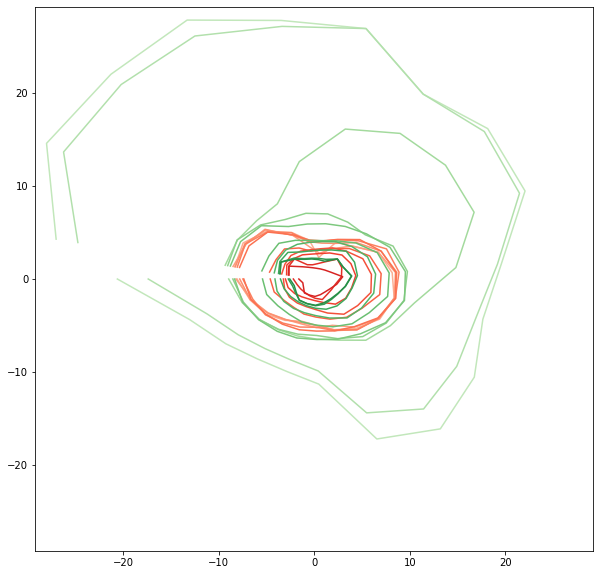

In [172]:
def plot_contour(x, color_range='green', flip_x=1, flip_y=1, rot90=False, all_levels=True, scaling=1):
    
    levels = x.keys()
    max_level = np.max(list(levels))
    min_level = np.min(list(levels))
    print('min/max level:', min_level, max_level)
    # level_subtraction = min_level - 1

    norm = mpl.colors.Normalize(vmin=min_level - 20, vmax=max_level + 20)

    if color_range=='green':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
        cmap0.set_array([])
    elif color_range=='blue':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
        cmap0.set_array([])
    elif color_range=='red':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
        cmap0.set_array([])
    else:
        color_range = None
        print(print('plotting black contours because of invalid color_range'))
    
        
    for level in sorted(x.keys()):
        c = cmap0.to_rgba(level) if color_range is not None else 'k'

        if rot90:
            plt.plot(x[level][0]*flip_y*scaling,x[level][1]*flip_x*scaling,color=c)
        else:
            plt.plot(x[level][1]*flip_x*scaling,x[level][0]*flip_y*scaling,color=c)
            
        if not all_levels: break
        
        

do_rot = True
do_y = 1
do_x = 1
fig, ax = plt.subplots(figsize=(10,10))
plot_contour(meta['nucleus_contour'], color_range='red', flip_x=do_x, flip_y=do_y, rot90=do_rot, scaling=meta['scaling'][0])
plot_contour(meta['cyto_contour'], color_range='green', flip_x=do_x, flip_y=do_y, rot90=do_rot, scaling=meta['scaling'][0])
plt.xlim(-400*meta['scaling'][0],400*meta['scaling'][0])
plt.ylim(-400*meta['scaling'][0],400*meta['scaling'][0])
# plt.

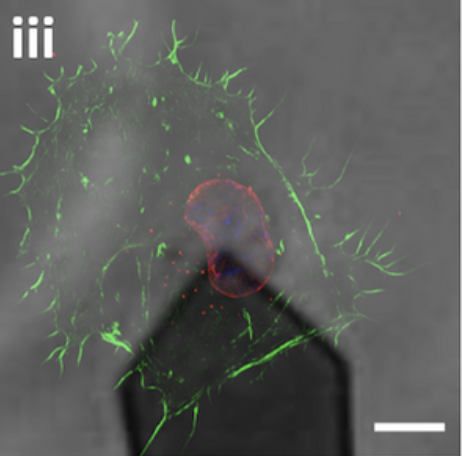m

min/max level: 9.0 44.0


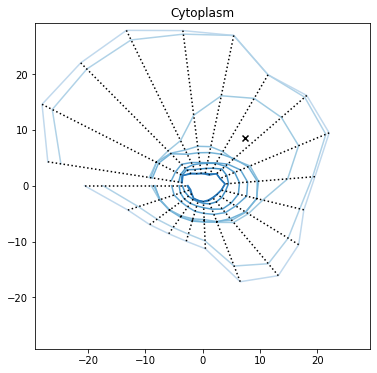

min/max level: 12.0 41.0


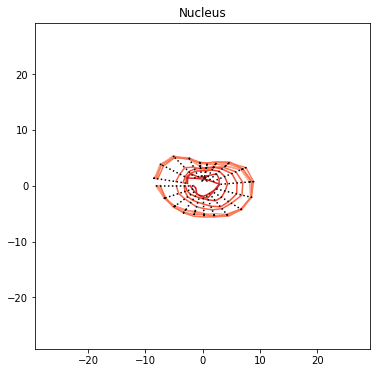

In [186]:
def plot_radial(x, color_range='green', flip_x=1, flip_y=1, rot90=False, scaling=1):
    
    levels = x.keys()
    max_level = np.max(list(levels))
    min_level = np.min(list(levels))
    print('min/max level:', min_level, max_level)
    # level_subtraction = min_level - 1

    norm = mpl.colors.Normalize(vmin=min_level - 20, vmax=max_level + 20)

    if color_range=='green':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
        cmap0.set_array([])
    elif color_range=='blue':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
        cmap0.set_array([])
    elif color_range=='red':
        cmap0 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
        cmap0.set_array([])
    else:
        color_range = None
        print(print('plotting black contours because of invalid color_range'))
    
    new_data = []
    for level in sorted(x.keys()):
        new_data.append([x[level][1]*flip_x*scaling,x[level][0]*flip_y*scaling])
        
        c = cmap0.to_rgba(level) if color_range is not None else 'k'

        if rot90:
            plt.plot(x[level][0]*flip_y*scaling,x[level][1]*flip_x*scaling,color=c)
        else:
            plt.plot(x[level][1]*flip_x*scaling,x[level][0]*flip_y*scaling,color=c)
            
#     new_data = np.transpose(np.array(new_data),[1,0,2])
    new_data = np.array(new_data).T
    for levelset in new_data:
        if rot90:
            plt.plot(levelset[1],levelset[0], color='k', linestyle=':')
        else:
            plt.plot(levelset[0],levelset[1], color='k', linestyle=':')
        

fig, ax = plt.subplots(figsize=(6,6))
plot_radial(meta['cyto_contour'], flip_x=do_x, flip_y=do_y, color_range='blue', rot90=True, scaling=meta['scaling'][0])
plt.xlim(-400*meta['scaling'][0],400*meta['scaling'][0])
plt.ylim(-400*meta['scaling'][0],400*meta['scaling'][0])


if do_rot:
    plt.scatter(do_x*extra['yn'], do_y*extra['xn'], marker='x', color='k')
else:
    plt.scatter(do_x*extra['xn'], do_y*extra['yn'], marker='x', color='k')


plt.title('Cytoplasm')
plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'radial_cyto_P%02d.pdf' % padding), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'radial_cyto_P%02d.png' % padding), dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim(-400*meta['scaling'][0],400*meta['scaling'][0])
plt.ylim(-400*meta['scaling'][0],400*meta['scaling'][0])
if do_rot:
    plt.scatter(do_x*extra['yc'], do_y*extra['xc'], marker='x', color='k')
else:
    plt.scatter(do_x*extra['xc'], do_y*extra['yc'], marker='x', color='k')
plot_radial(meta['nucleus_contour'], flip_x=do_x, flip_y=do_y, color_range='red', rot90=True, scaling=meta['scaling'][0])

plt.title('Nucleus')

plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'radial_nucleus_P%02d.pdf' % padding), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'radial_nucleus_P%02d.png' % padding), dpi=300, bbox_inches='tight')

plt.show()


In [174]:
# Questions: why are they both centered at 0, and how do I fix this? [ok]
# Task: Add markers to these plots [ok]
# Task: Produce overlay figure with appropriate mirroring [skip]
# Task: Produce 0-padding, N-padding comparison figure

In [175]:
extra = np.load('../export_contours/temp/contours_huvec_P00_1_temp/dumped/extra.npy', 
               allow_pickle=True).item(); print(extra.keys())

dict_keys(['fname', 'comment', 'DZ', 'xn', 'yn', 'xc', 'yc'])


In [176]:
extra['xn'], extra['yn'], extra['xc'], extra['yc']

(8.56680015457433, 7.318523992183409, 1.378106999387895, 0.2020378972981177)

In [177]:
meta['scaling']

(0.07299307405966708, 0.07299307405966708, 0.1)

In [178]:
# Todo:
# Lowest level of each + marker, to illustrate alignment (red, blue)
# Interpolated layers of each, for different paddings
# Save all plots

# you're almost there.

# Lowest levels

min/max level: 12.0 41.0
min/max level: 9.0 44.0


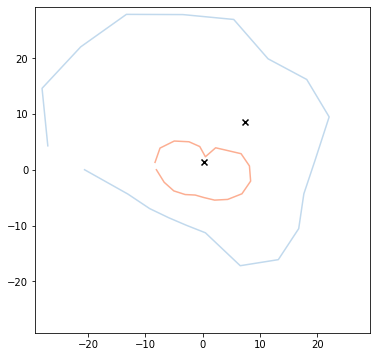

In [187]:
do_rot = True
do_y = 1
do_x = 1
fig, ax = plt.subplots(figsize=(6,6))
plot_contour(meta['nucleus_contour'], color_range='red', flip_x=do_x, flip_y=do_y, rot90=do_rot, all_levels=False, scaling=meta['scaling'][0])
plot_contour(meta['cyto_contour'], color_range='blue', flip_x=do_x, flip_y=do_y, rot90=do_rot, all_levels=False, scaling=meta['scaling'][0])
plt.xlim(-400*meta['scaling'][0],400*meta['scaling'][0])
plt.ylim(-400*meta['scaling'][0],400*meta['scaling'][0])
# plt.
if do_rot:
    plt.scatter(do_x*extra['yn'], do_y*extra['xn'], marker='x', color='k')
else:
    plt.scatter(do_x*extra['xn'], do_y*extra['yn'], marker='x', color='k')

if do_rot:
    plt.scatter(do_x*extra['yc'], do_y*extra['xc'], marker='x', color='k')
else:
    plt.scatter(do_x*extra['xc'], do_y*extra['yc'], marker='x', color='k')

plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'lowest_levels_P%02d.pdf' % padding), dpi=300, bbox_inches='tight')
plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'lowest_levels_P%02d.png' % padding), dpi=300, bbox_inches='tight')


# Different paddings, all layers

In [ ]:
# First, dump with suffix
# Edit loading instruction above
# Plot the full-layer version with different titles
# Save all as pdf
# Go back and save additional plots

min/max level: 12.0 41.0
min/max level: 9.0 44.0


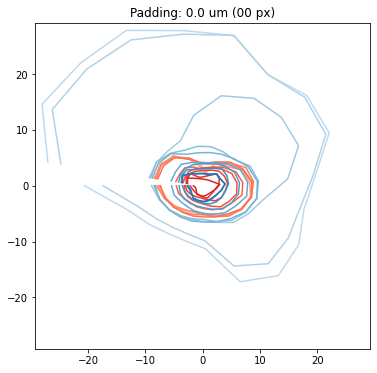

min/max level: 12.0 41.0
min/max level: 9.0 44.0


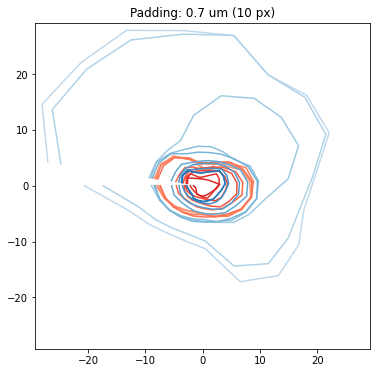

min/max level: 12.0 41.0
min/max level: 9.0 44.0


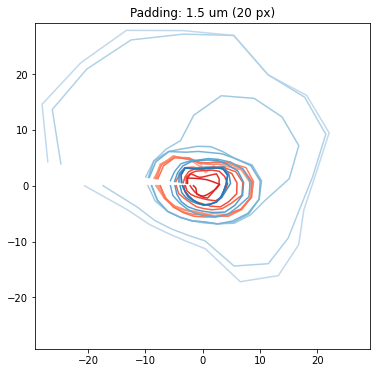

min/max level: 12.0 41.0
min/max level: 9.0 44.0


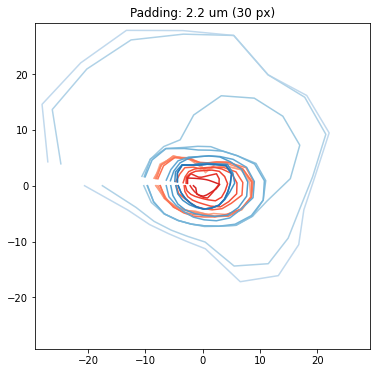

min/max level: 12.0 41.0
min/max level: 9.0 44.0


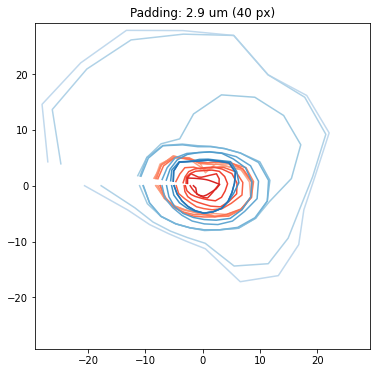

min/max level: 12.0 41.0
min/max level: 9.0 44.0


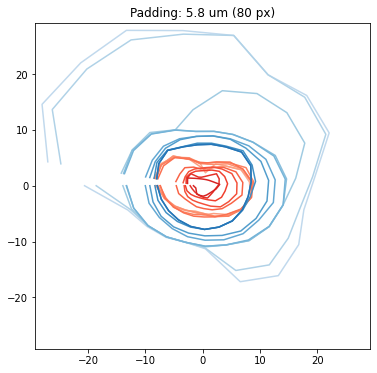

In [189]:
for padding in [0, 10, 20, 30, 40, 80]:
    meta = np.load('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/to_dump.npy' % padding, 
               allow_pickle=True).item(); # print(meta.keys())
    
    do_rot = True
    do_y = 1
    do_x = 1
    fig, ax = plt.subplots(figsize=(6,6))
    plot_contour(meta['nucleus_contour'], color_range='red', flip_x=do_x, flip_y=do_y, rot90=do_rot, scaling=meta['scaling'][0])
    plot_contour(meta['cyto_contour'], color_range='blue', flip_x=do_x, flip_y=do_y, rot90=do_rot, scaling=meta['scaling'][0])
    plt.xlim(-400*meta['scaling'][0],400*meta['scaling'][0])
    plt.ylim(-400*meta['scaling'][0],400*meta['scaling'][0])
    plt.title('Padding: %0.1f um (%02d px)' % (padding*meta['scaling'][0],padding))
    
    plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'padding_plot_P%02d.pdf' % padding), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join('../export_contours/temp/contours_huvec_P%02d_1_temp/dumped/' % padding, 'padding_plot_P%02d.png' % padding), dpi=300, bbox_inches='tight')

    plt.show()